In [1]:
%matplotlib notebook
import numpy as np
from numpy.linalg import norm as norm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import math as m

import matplotlib.pyplot as plt
import np_info_analysis as na


yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [2]:
def U(k, x):
    return U0*np.exp(1j*np.dot(np.real(k), x))

def Udiff(k, r, x):
    rr=norm(x-r)
    p=np.dot(x-r, np.array([1,0]))/rr #scalar product disabling SPP with k perpendicular to original SPP
    if rr==0:
        return 0.2
    return 0.2*U(k, r)*np.exp(1j*rr*norm(np.real(k)))*p*np.exp(-norm(np.imag(k))*rr)#/((rr+2.93e6)**0.5)

def intensity(u):
    return u*np.conjugate(u)

In [20]:
U0=1
# k=np.array([2*m.pi/534e-9,0])

# k=np.array([(11755041.21345882+78217.09878973379j), 0]) #750
# k=np.array([(15604823.125390332-526208.287757275j), 0]) #600
k=np.array([(14000259.1178857-236982.93413896085j), 0]) #650
      
r=np.array([100,50])*2.93e-6

In [21]:
X=np.arange(0,200*2.93, 2.93)*1e-6
Y=np.arange(0,100*2.93, 2.93)*1e-6
data=np.zeros([len(Y),len(X)])

for i in range(len(Y)):
    for j in range(len(X)):
        x=X[j]
        y=Y[i]
        data[i,j]=intensity(U(k,np.array([x,y]))+Udiff(k, r, [x,y])*np.exp(1j*m.pi))
        data[i,j]+=intensity(U(-1*np.conjugate(k),np.array([x,y]))+Udiff(-1*np.conjugate(k), r, [x,y])*np.exp(1j*m.pi))
    
#         data[i,j]=intensity(Udiff(k, r, [x,y])*np.exp(1j*m.pi))

C:\Users\bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
C:\Users\bukacek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


<IPython.core.display.Javascript object>


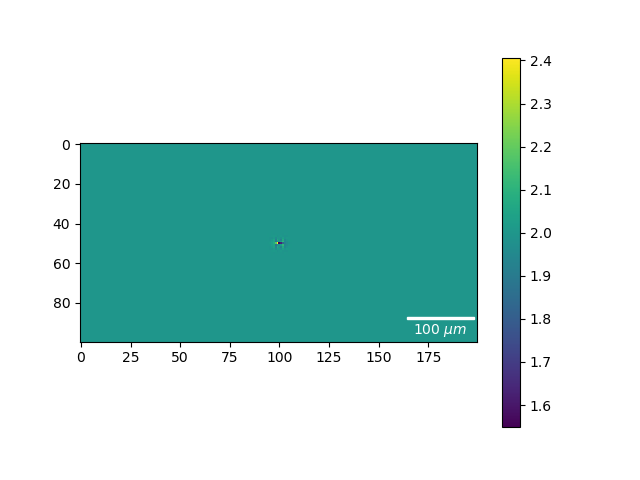

In [22]:
fig, ax = plt.subplots()
img = ax.imshow(data)
fig.colorbar(img)

fontprops = fm.FontProperties(size=10)
scalebar = AnchoredSizeBar(ax.transData,
           34, '100 $\mu m$', 'lower right', 
           pad=0.1,
           color='white',
           frameon=False,
           size_vertical=1,
           fontproperties=fontprops)

ax.add_artist(scalebar)
img.setlim=(0, 20)

<IPython.core.display.Javascript object>


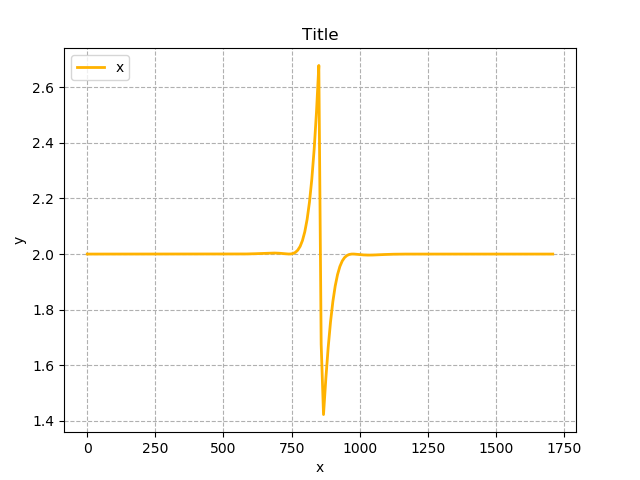

In [446]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.grid(linestyle='--')
axes.set_title('Title')
axes.set_xlabel('x')
axes.set_ylabel('y')

x = np.arange(1,10,0.2)
y = x**2 

name='test_01'
axes.plot(X*2.93e6,data[50,:], color=yellow, linewidth=2, label='x')
# axes.plot(x, x**3, color=blue, linewidth=2, label='y')
axes.legend(loc=2)
# fig.savefig('jupyter_plots/' + name + '.png', dpi=300)

In [3]:
171/(0.8*3.67)*400

23297.002724795642

In [11]:
(0.8*3.67)

2.936

In [8]:
171/(0.8*3.67)*2

116.4850136239782

In [9]:
113/(76.2*53.3/1e6)-116

27706.50717722198

In [13]:
76.2*53.3

4061.46

In [10]:
23297/27706.5

0.8408496201252413

In [9]:
15*2.93

43.95